# Decoder Causal Language Models (GPT-like)
Learn how to build and understand GPT-style language models with causal masking.

## Setup and Imports

In [17]:
!pip install transformers datasets --quiet
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from datasets import load_dataset

## Dataset
We’ll use a small sample.

In [26]:
text = (
    "Language models are powerful tools for natural language understanding. "
    "GPT-like models use autoregressive decoding to predict the next word based only on past context. "
    "This allows them to generate fluent and coherent text."
)

## Tokenization
We tokenize the text using a GPT-style tokenizer.

In [27]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# When tokenizing your input text
inputs = tokenizer(text, return_tensors="pt", padding=True)

# When generating text with the model
output = model.generate(
    inputs["input_ids"],
    attention_mask=inputs["attention_mask"], # Crucial for reliable results
    max_length=50 # Adjust as needed to control output length
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


## Causal Masking
Causal (autoregressive) models are trained so each token can only 'see' previous tokens.

This is implemented using triangular masking during training.

## Load GPT-2 Model

In [28]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("gpt2")
model.eval()

output = model.generate(
    inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    max_new_tokens=50,
    do_sample=True,
    pad_token_id=tokenizer.eos_token_id
)

print(tokenizer.decode(output[0], skip_special_tokens=True))

Language models are powerful tools for natural language understanding. GPT-like models use autoregressive decoding to predict the next word based only on past context. This allows them to generate fluent and coherent text. Natural language models are most useful in teaching about natural language cognition to children who have been taught the basics of language training from adult learners, because these early training sessions and the lessons were able to improve comprehension by adults with better understanding. These models are useful


## Generate Text

In [33]:
generated = model.generate(inputs["input_ids"], max_new_tokens=50, do_sample=True)

# Decode the output
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Language models are powerful tools for natural language understanding. GPT-like models use autoregressive decoding to predict the next word based only on past context. This allows them to generate fluent and coherent text. For example, if one learns this model using text that is not syntactically ambiguous, one would learn how words like 'A' and 'O' are related to an object and that both are related to the same word as well as other objects
Language models are powerful tools for natural language understanding. GPT-like models use autoregressive decoding to predict the next word based only on past context. This allows them to generate fluent and coherent text. Natural language models are most useful in teaching about natural language cognition to children who have been taught the basics of language training from adult learners, because these early training sessions and the lessons were able to improve comprehension by adults with better understanding. These models are useful


Language models are powerful tools for natural language understanding. GPT-like models use autoregressive decoding to predict the next word based only on past context. This allows them to generate fluent and coherent text. Natural language models are most useful in teaching about natural language cognition to children who have been taught the basics of language training from adult learners, because these early training sessions and the lessons were able to improve comprehension by adults with better understanding. These models are useful


## Visualizing the Attention Mask (Optional, Educational Only)

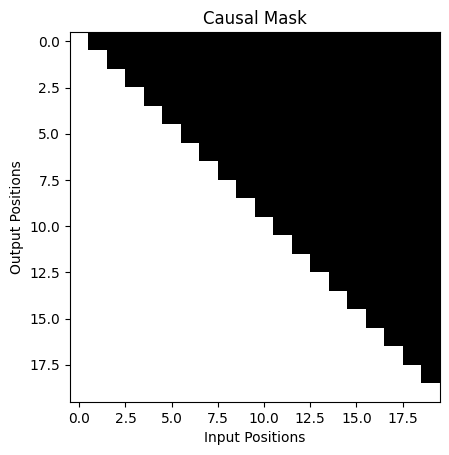

In [31]:
import matplotlib.pyplot as plt

def show_causal_mask(seq_len):
    mask = torch.tril(torch.ones(seq_len, seq_len))
    plt.imshow(mask, cmap="gray")
    plt.title("Causal Mask")
    plt.xlabel("Input Positions")
    plt.ylabel("Output Positions")
    plt.show()

show_causal_mask(20)

In [34]:
print("\n--- Interactive Text Generation ---")
print("Enter your prompt below. Type 'quit' or 'exit' to stop.")

while True:
    # 1. Get input from the user
    user_prompt = input("\nYour prompt: ")

    if user_prompt.lower() in ['quit', 'exit']:
        print("Exiting interactive generation.")
        break

    if not user_prompt.strip():
        print("Prompt cannot be empty. Please enter some text.")
        continue

    try:
        # 2. Tokenize the user's input
        # We ensure padding is handled and return PyTorch tensors
        inputs = tokenizer(user_prompt, return_tensors="pt", padding=True)

        # 3. Generate text using the model
        # Pass both input_ids and attention_mask for reliable results
        # max_new_tokens controls how much new text is generated
        # do_sample=True enables sampling (more creative/diverse output)
        # pad_token_id is explicitly set to avoid warnings, though it should be handled by tokenizer.pad_token
        generated_output = model.generate(
            inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_new_tokens=50, # Generate up to 50 new tokens
            do_sample=True,
            temperature=0.7, # Controls randomness (higher = more random)
            top_k=50,        # Limits sampling to top_k most probable words
            pad_token_id=tokenizer.eos_token_id # Explicitly set pad_token_id
        )

        # 4. Decode the generated output
        # skip_special_tokens=True removes special tokens like EOS from the output
        decoded_text = tokenizer.decode(generated_output[0], skip_special_tokens=True)

        print("\nGenerated Text:")
        print(decoded_text)

    except Exception as e:
        print(f"An error occurred during generation: {e}")
        print("Please try a different prompt or restart the runtime if the issue persists.")


--- Interactive Text Generation ---
Enter your prompt below. Type 'quit' or 'exit' to stop.

Your prompt: hi, how are you? Tell me more about GPT2

Generated Text:
hi, how are you? Tell me more about GPT2, what are you thinking about?

In fact, I have been thinking about this a lot lately. It's been a big focus of my life, because I have a lot of friends and family, all over the world. But I've

Your prompt: What is GPT2?

Generated Text:
What is GPT2?

The GPT2 is the first step in the progression of GPT development. A new GPT system will be introduced at the end of 2015.

GPT2 will also provide a way to bring the development of GPT into

Your prompt: quit
Exiting interactive generation.


## Summary
- Decoder models like GPT use **causal masking** to prevent tokens from seeing the future.
- `transformers` library makes it easy to load pretrained causal models.
- GPT-style models are **autoregressive**, good for tasks like text generation.
